# Setup 

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

In [3]:
%cd keras-retinanet/

!pip install .

D:\Safety-Helmet\keras-retinanet
Processing d:\safety-helmet\keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp37-cp37m-win_amd64.whl size=131556 sha256=685921d5a8926e7e9a1b390df7346f1fc918a1750f8099c03559d3240636534a
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\7e\c0\5c\1bf1fdef3865502fb72dca92c300700e6323e5596157c561cf
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\envs\NewEnv\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\ASUS\anaconda3\envs\NewEnv\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\envs\NewEnv\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\ASUS\anaconda3\envs\NewEnv\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\

In [4]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils\compute_overlap.c
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build\temp.win-amd64-3.7
creating build\temp.win-amd64-3.7\Release
creating build\temp.win-amd64-3.7\Release\keras_retinanet
creating build\temp.win-amd64-3.7\Release\keras_retinanet\utils
C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.25.28610\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Users\ASUS\anaconda3\envs\NewEnv\include -IC:\Users\ASUS\anaconda3\envs\NewEnv\include -IC:\Users\ASUS\anaconda3\envs\NewEnv\lib\site-packages\numpy\core\include "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.25.28610\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.25.28610\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.18362.0\ucrt" "-IC:\Program Files (x86)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: D:\Safety-Helmet\keras-retinanet\keras_retinanet\utils\compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [1]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [14]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Making Dataset

In [2]:
!gdown --id 1R1t7J7D3fjDjMjyl3Ki50AHylxzdrRau --output SH.zip

Downloading...
From: https://drive.google.com/uc?id=1R1t7J7D3fjDjMjyl3Ki50AHylxzdrRau
To: D:\Safety-Helmet\keras-retinanet\SH.zip

0.00B [00:00, ?B/s]
524kB [00:11, 47.1kB/s]
1.05MB [00:22, 46.5kB/s]
1.57MB [00:36, 43.8kB/s]
1.57MB [00:50, 43.8kB/s]
2.10MB [00:50, 42.0kB/s]
2.62MB [00:59, 45.2kB/s]
3.15MB [01:09, 46.6kB/s]
3.15MB [01:20, 46.6kB/s]
3.67MB [01:20, 47.6kB/s]
4.19MB [01:28, 51.9kB/s]
4.72MB [01:35, 56.7kB/s]
5.24MB [01:46, 53.3kB/s]
5.77MB [01:57, 52.3kB/s]
6.29MB [02:09, 49.0kB/s]
6.29MB [02:20, 49.0kB/s]
6.82MB [02:22, 45.8kB/s]
7.34MB [02:35, 44.9kB/s]
7.86MB [02:42, 50.0kB/s]
8.39MB [02:50, 54.4kB/s]
8.91MB [03:02, 50.8kB/s]
9.04MB [03:05, 45.7kB/s]
9.04MB [03:05, 48.7kB/s]


In [19]:
DATASET_DIR = 'dataset'
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [4]:
file_name = 'SH.zip'
os.makedirs(DATASET_DIR, exist_ok=True)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall(DATASET_DIR)
os.remove(file_name)
print('Extract completed!')

Extract completed!


In [78]:
classes = set([])
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()


for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()
    
  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      dataset["image_name"].append(file_name)
      dataset["x_min"].append(coords[0])
      dataset["y_min"].append(coords[1])
      dataset["x_max"].append(coords[2])
      dataset["y_max"].append(coords[3])
      dataset["class_name"].append(obj_name)
      classes.add(obj_name)

with open(CLASSES_FILE, 'w') as f:
    for i, line in enumerate(classes):
        f.write('{},{}\n'.format(line,i))

In [80]:
df = pd.DataFrame(dataset)
df.head(n=10)

,image_name,x_min,y_min,x_max,y_max,class_name
0,dataset\s1.jpg,210,42,433,202,Helmet
1,dataset\s10.jpg,338,167,699,391,Helmet
2,dataset\s11.jpg,32,11,392,235,Helmet
3,dataset\s12.jpg,166,81,348,205,Helmet
4,dataset\s12.jpg,397,177,529,264,Helmet
5,dataset\s12.jpg,598,251,688,317,Helmet
6,dataset\s12.jpg,703,230,803,302,Helmet
7,dataset\s13.jpg,73,7,171,66,Helmet
8,dataset\s13.jpg,236,42,320,96,Helmet
9,dataset\s13.jpg,373,3,465,56,Helmet


In [81]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

In [82]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

# Training Model

In [ ]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

#### DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.0/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

In [ ]:
!python keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 500 --epochs 10 csv annotations.csv classes.csv

# Inference

In [23]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

snapshots\resnet50_csv_10.h5
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [

In [24]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [25]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

In [60]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [41]:
test_df.head(n=10)

,image_name,x_min,y_min,x_max,y_max,class_name
4,dataset\s12.jpg,397,177,529,264,Helmet
35,dataset\s25.jpg,568,49,763,205,Helmet
10,dataset\s14.jpg,119,79,264,160,Helmet
0,dataset\s1.jpg,210,42,433,202,Helmet
45,dataset\s30.jpg,70,226,200,352,Helmet
47,dataset\s30.jpg,674,97,940,302,Helmet
66,dataset\s40.jpg,68,22,212,138,Helmet
53,dataset\s35.jpg,199,61,392,206,Helmet
50,dataset\s32.png,406,46,460,88,Helmet
28,dataset\s23.jpg,506,67,788,293,Helmet


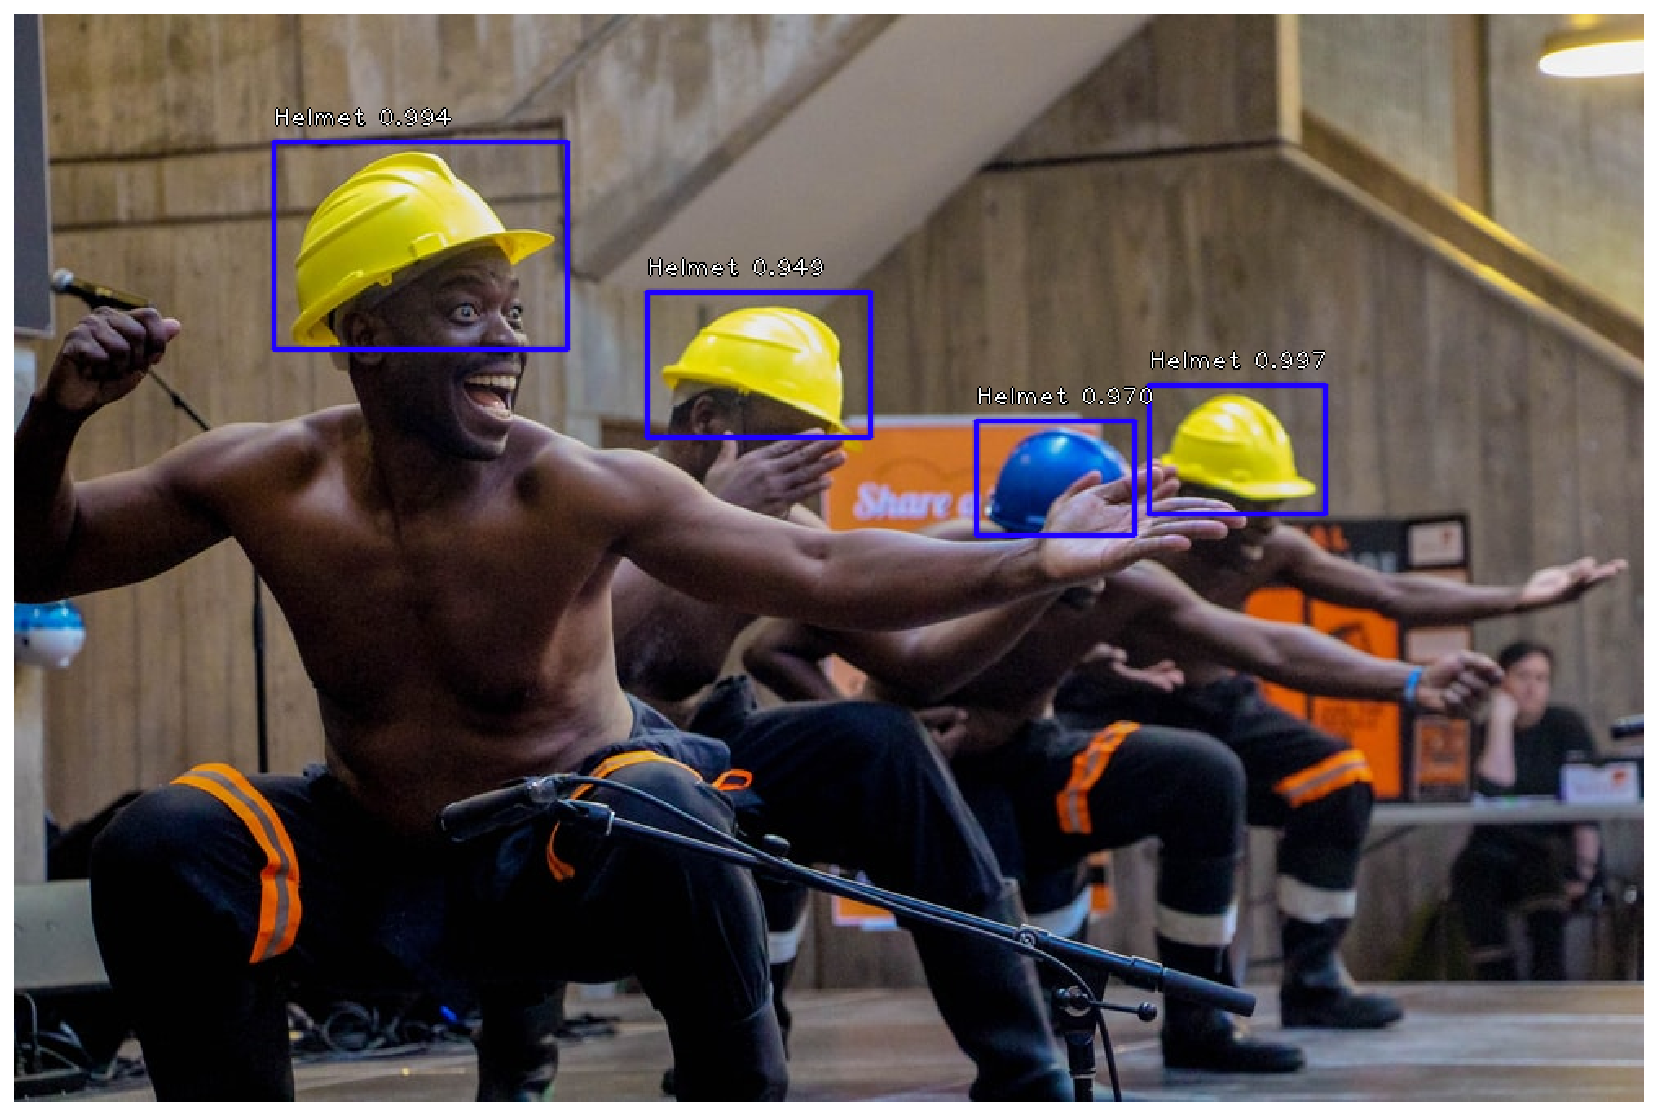

In [61]:
show_detected_objects(test_df.iloc[0])